
Bitcoin Data:
               0             1             2             3             4  \
0  1703721600000  43465.851971  43812.413262  43436.953652  43581.399472   
1  1703725200000  43591.056375  43739.063403  43466.343723  43466.343723   
2  1703728800000  43483.390956  43497.685221  43344.570588  43405.061247   
3  1703732400000  43402.474426  43443.028582  43351.293781  43441.679560   
4  1703736000000  43442.161101  43641.645644  43340.040006  43344.158537   
5  1703739600000  43332.685929  43381.285332  43175.310766  43247.485736   
6  1703743200000  43233.211433  43238.480359  43010.525820  43044.852062   
7  1703746800000  43040.813915  43070.813821  42871.294056  43058.559814   
8  1703750400000  43058.888262  43078.616442  42940.350059  42943.543599   
9  1703754000000  42944.768488  43102.118760  42893.452593  43062.759636   

              5  
0  8.562555e+08  
1  5.188926e+08  
2  3.912197e+08  
3  2.776087e+08  
4  4.458998e+08  
5  5.210045e+08  
6  4.208934e+08  
7  6

C:\Users\Hp\AppData\Local\Temp\ipykernel_2560\3424590000.py:94: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = self.df.corr() # This line calculates the correlation matrix of the DataFrame and assigns it to 'correlation_matrix'.


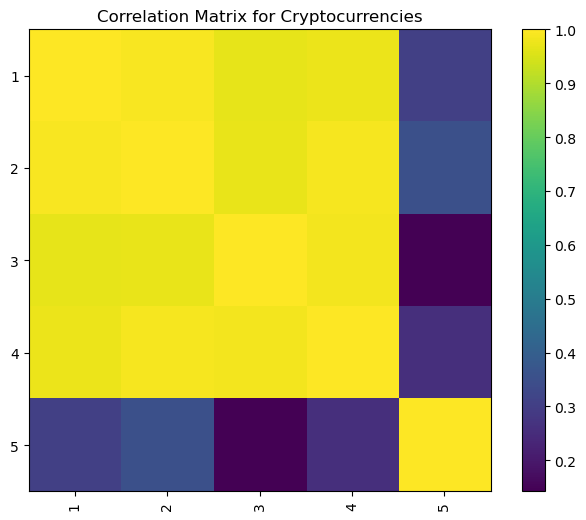

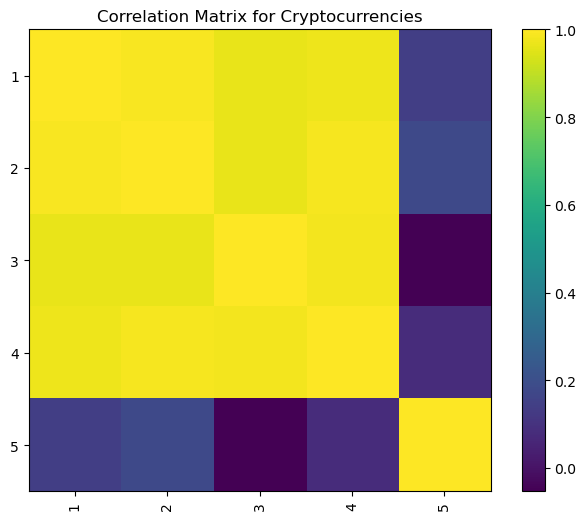

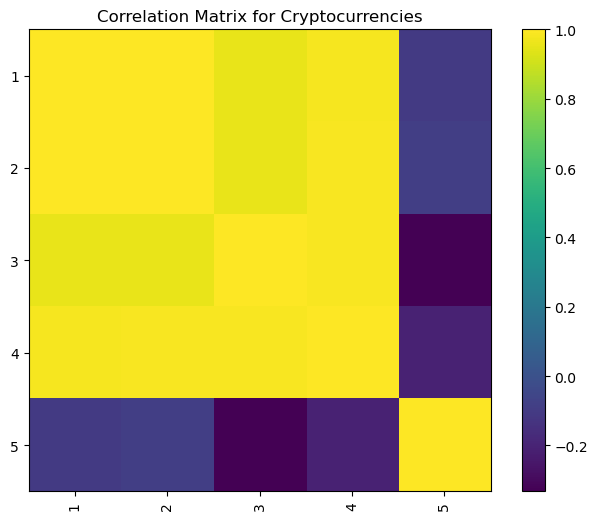

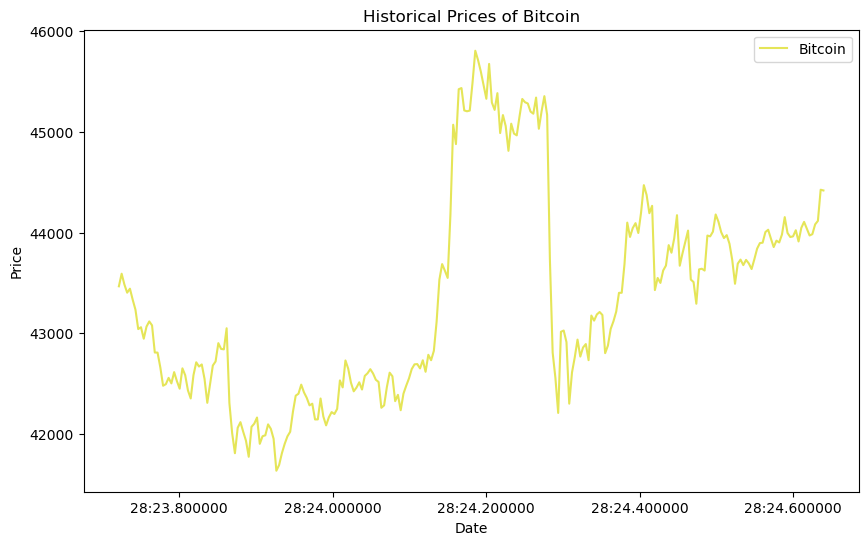

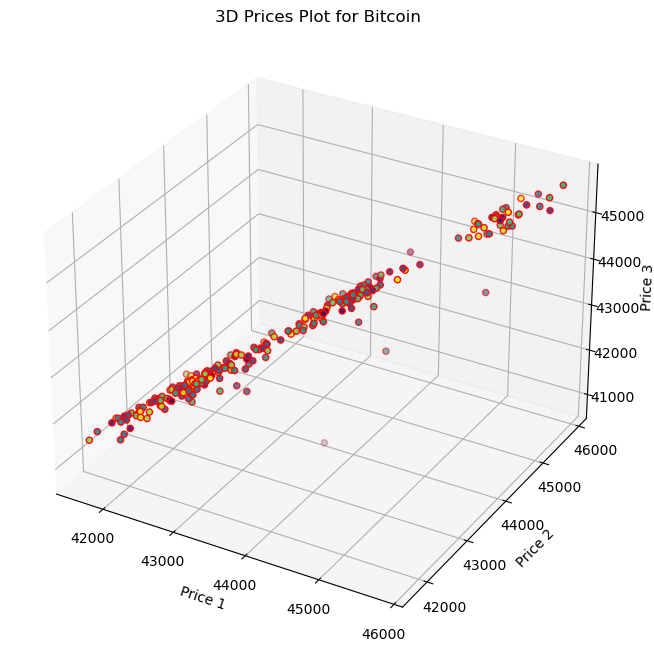

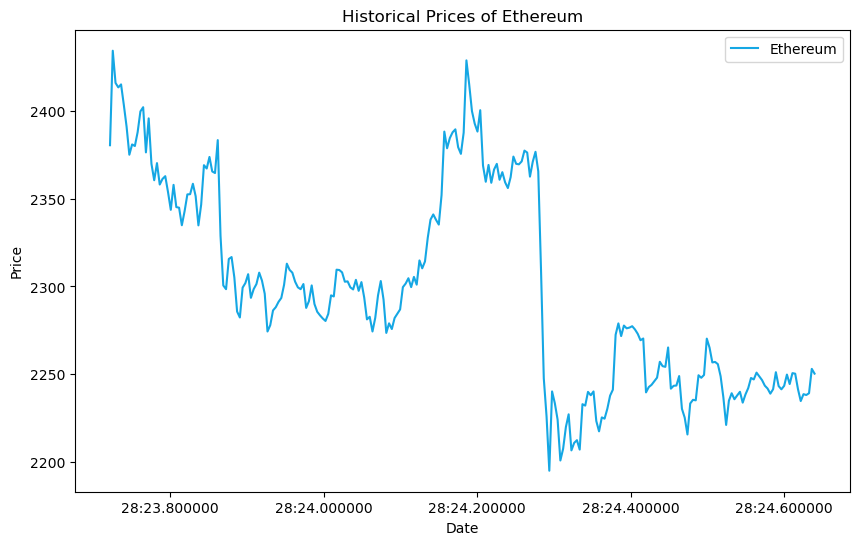

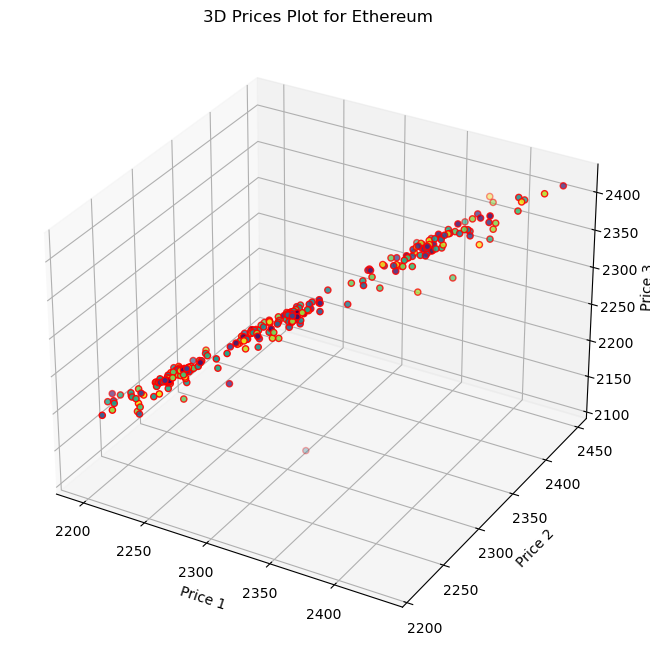

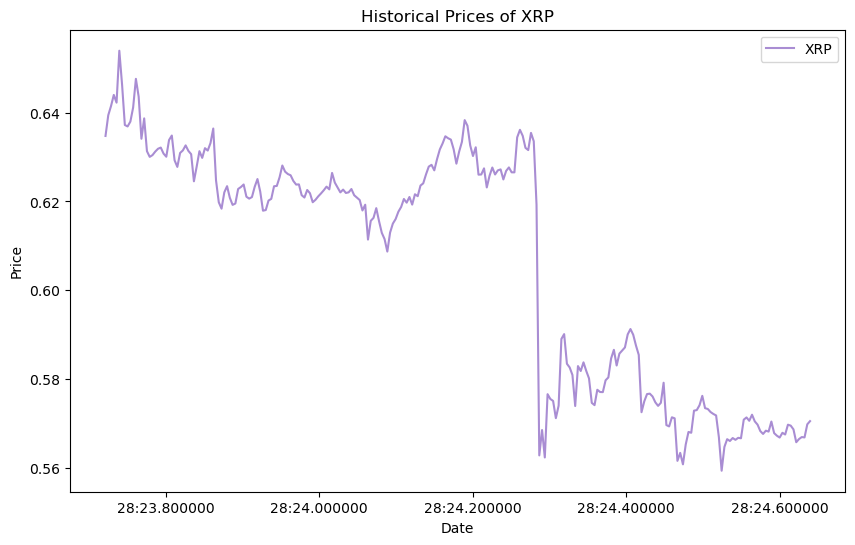

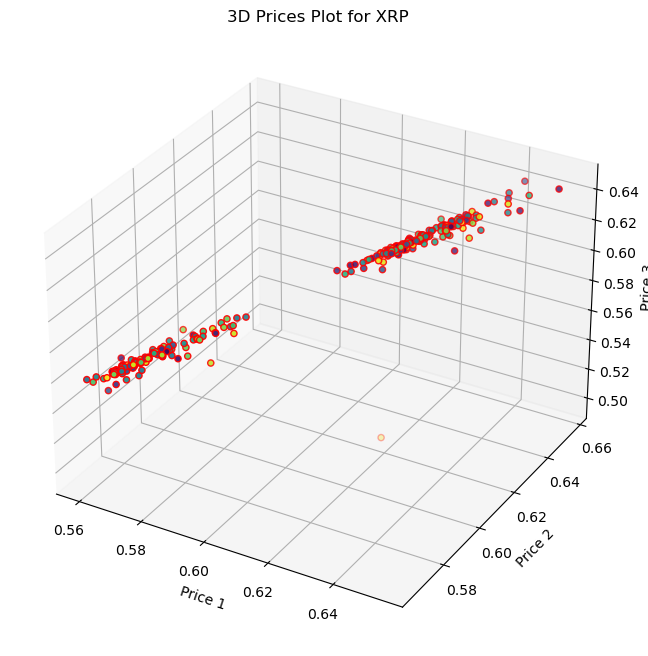

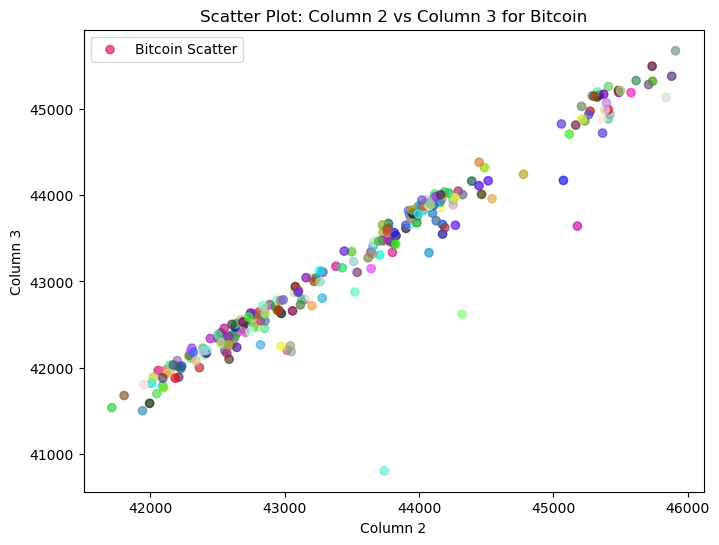

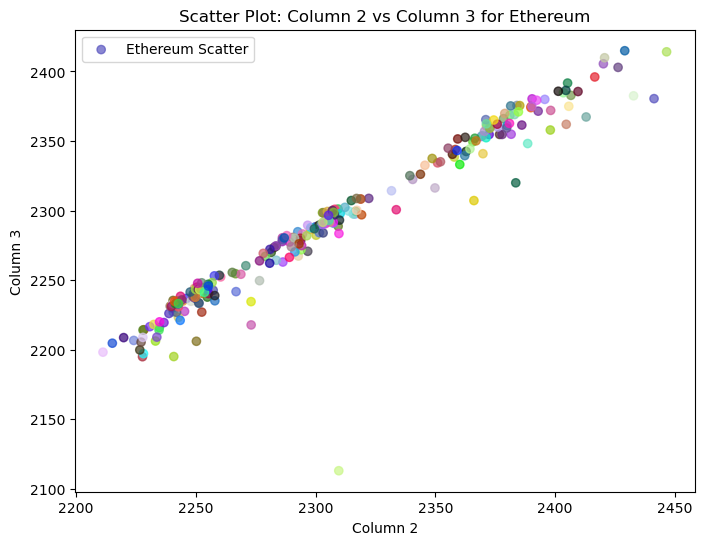

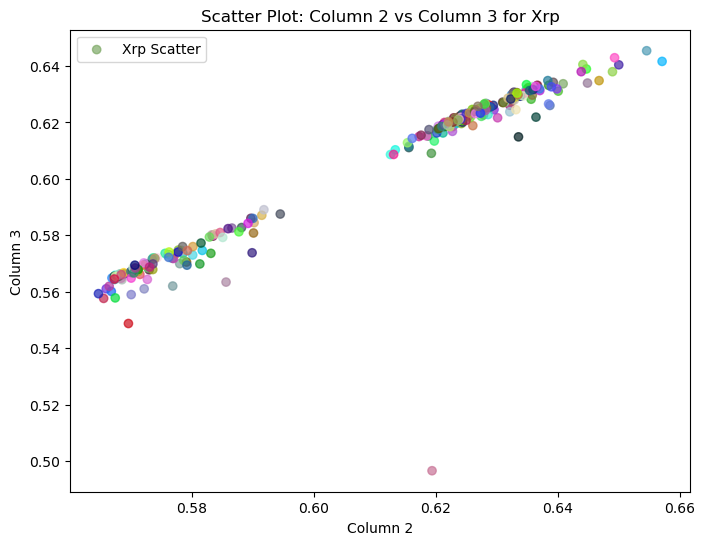

1 : Bitcoin
2 : Ethereum
3 : XRP
Enter The Choice : 1
Log returns added to the CSV file.
Statistics added to bitcoin_data.csv
All functions executed successfully!
Maximum return dates: {1: Timestamp('1970-01-01 00:28:24.157200'), 2: Timestamp('1970-01-01 00:28:24.153600'), 3: Timestamp('1970-01-01 00:28:24.286800'), 4: Timestamp('1970-01-01 00:28:24.153600')}
Highest opening price: 45807.57204453909
1: Bitcoin
2: Ethereum
3: XRP
Enter the choice: 2
Log returns added to the CSV file.


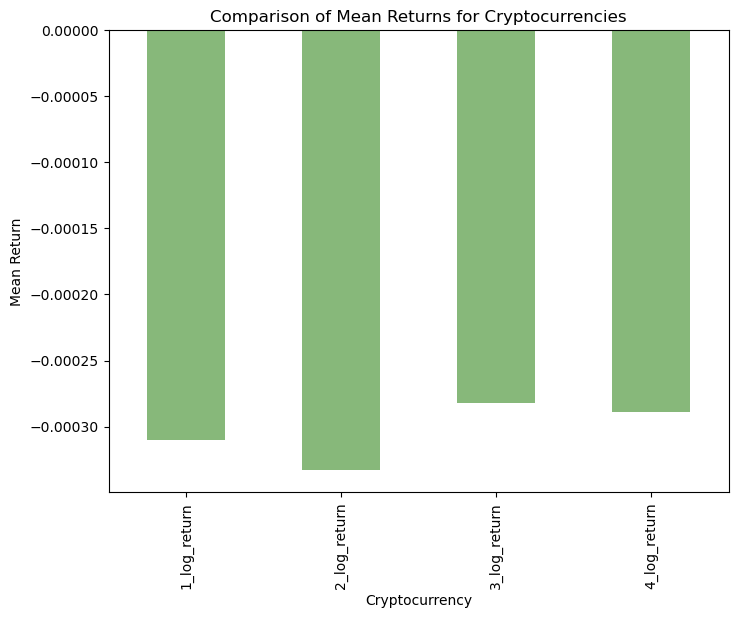

1: Bitcoin
2: Ethereum
3: XRP
Enter the choice: 3
Log returns added to the CSV file.


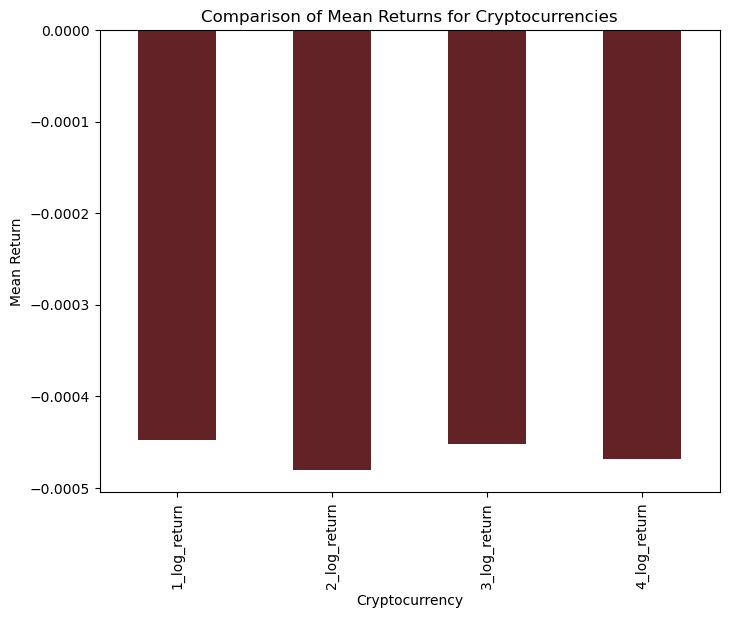

1. 1 day
2. 1 week
3. 30 days
Enter the time span: 1
1 : Bitcoin
2 : Ethereum
3 : XRP
Enter The Choice : 1
Log returns added to the CSV file.
                           0             1             2             3  \
0 1970-01-01 00:28:23.721600  43465.851971  43812.413262  43436.953652   
1 1970-01-01 00:28:23.725200  43591.056375  43739.063403  43466.343723   

              4             5  1_log_return  2_log_return  3_log_return  \
0  43581.399472  8.562555e+08           NaN           NaN           NaN   
1  43466.343723  5.188926e+08     -0.001182     -0.001409     -0.001183   

   4_log_return  
0           NaN  
1     -0.001175  
               time  opening_price  closing_price        high         low  \
count  2.560000e+02     256.000000     256.000000  256.000000  256.000000   
mean   1.704181e+12       0.606245       0.608314    0.603373    0.605963   
std    2.665621e+08       0.027009       0.026956    0.027888    0.027038   
min    1.703722e+12       0.559349       0.5647

In [ ]:
import requests # This line imports the 'requests' library which allows you to send HTTP requests in Python.
import pandas as pd # This line imports the 'pandas' library as 'pd'. Pandas is used for data manipulation and analysis.
import numpy as np # This line imports the 'numpy' library as 'np'. Numpy is used for mathematical operations on large, multi-dimensional arrays and matrices.
import matplotlib.pyplot as plt # This line imports the 'matplotlib.pyplot' library as 'plt'. This library is used for creating static, animated, and interactive visualizations in Python.
from colorama import Fore # This line imports the 'Fore' class from the 'colorama' library. This is used to color the text that is printed to the console.
import tkinter as tk # This line imports the 'tkinter' library as 'tk'. Tkinter is used for creating GUI applications.
from tkinter import simpledialog, messagebox # This line imports the 'simpledialog' and 'messagebox' modules from 'tkinter'. These are used for creating simple dialog boxes and message boxes in the GUI.

class CryptoData:# This line defines a new class named 'CryptoData'
    def __init__(self, df):# Initializes a CryptoData object with a DataFrame 'df'
        self.df = df# Assigns the passed DataFrame to the instance attribute 'self.df'
        self.clean_data()# Calls the clean_data method to clean the DataFrame upon initialization

    def clean_data(self):# This line defines a method named 'clean_data'. It doesn't take any parameters apart from 'self'.
        columns_to_fill = [f"{i}_log_return" for i in range(1, 5)]# This line creates a list of column names to fill.
        for column in columns_to_fill:# This line starts a for loop that iterates over each column in 'columns_to_fill'
            if column in self.df.columns:# This line checks if the current column is in the DataFrame's columns.
                self.df[column].fillna(self.df[column].mean(), inplace=True)# If the column is in the DataFrame's columns, this line fills the NaN values in the column with the mean of the column.
        
        if 0 in self.df.columns:# This line checks if '0' is in the DataFrame's columns.
            self.df[0] = pd.to_datetime(self.df[0])# If '0' is in the DataFrame's columns, this line converts the '0' column to a datetime object.
            self.df = self.df.set_index(0).interpolate(method='time').reset_index() # This line sets the '0' column as the index, interpolates the DataFrame using the 'time' method, and then resets the index.

    def transform_to_log_returns(self):
        price_columns = [1, 2, 3, 4]
        for col in price_columns:
            if col in self.df.columns:
                log_return_col = f'{col}_log_return'
                self.df[log_return_col] = np.log(self.df[col] / self.df[col].shift(1))

            # Handle missing values or initialize columns if not present
                if self.df[log_return_col].isnull().values.any():
                    first_valid_index = self.df[log_return_col].first_valid_index()
                    if first_valid_index is not None:
                        mean_first_20 = self.df[log_return_col].iloc[:20].mean()
                        self.df.at[first_valid_index, log_return_col] = mean_first_20

    # Ensure all log return columns are available
        for col in [f'{i}_log_return' for i in price_columns]:
            if col not in self.df.columns:
                self.df[col] = np.nan

    # Save the updated DataFrame to the same CSV file
        self.df.to_csv('log_data_csv', index=False)  # Replace 'your_existing_file.csv' with your file name
        print_colored(f"Log returns added to the CSV file.", Fore.GREEN)

    def add_statistics_to_csv(self, filename):
        statistics = pd.DataFrame({
            'Mean': self.df.mean(numeric_only=True),
            'Median': self.df.median(numeric_only=True),
            'Standard_Deviation': self.df.std()
        }).transpose()

        log_return_stats = self.df.filter(regex='_log_return$').describe().loc[['mean', 'std']]
        log_return_stats.index = ['Mean_Log_Return', 'Std_Log_Return']

        statistics = pd.concat([statistics, log_return_stats])

        statistics.to_csv(filename, mode='a', header=True, index=True)
        print_colored(f"Statistics added to {filename}", Fore.GREEN)

    def identify_date_highest_return(self): # This line defines a method named 'identify_date_highest_return'. It doesn't take any parameters apart from 'self'.
        price_columns = [1, 2, 3, 4] # This line creates a list of column names that represent price columns.
        max_return_dates = {} # This line creates an empty dictionary named 'max_return_dates'.
        for col in price_columns: # This line starts a for loop that iterates over each column in 'price_columns'.
            if f'{col}_log_return' in self.df.columns: # This line checks if the log return column of the current column is in the DataFrame's columns.
                max_return_idx = self.df[f'{col}_log_return'].idxmax() # If the log return column is in the DataFrame's columns, this line gets the index of the maximum value in the log return column.
                max_return_dates[col] = self.df.loc[max_return_idx, 0] # This line assigns the date corresponding to the maximum log return to the current column in 'max_return_dates'.
        return max_return_dates # This line returns the 'max_return_dates' dictionary.

    def get_highest_opening_price(self): # This line defines a method named 'get_highest_opening_price'. It doesn't take any parameters apart from 'self'.
        max_opening_price = self.df[1].max() # This line gets the maximum value in the '1' column of the DataFrame and assigns it to 'max_opening_price'.
        return max_opening_price # This line returns 'max_opening_price'.

    def plot_historical_prices(self, crypto_name): # This line defines a method named 'plot_historical_prices'. It takes two parameters - 'self' and 'crypto_name'.
        plt.figure(figsize=(10, 6)) # This line creates a new figure with a size of 10x6.
        plt.plot(self.df[0], self.df[1], label=crypto_name, color=np.random.rand(3,)) # This line plots the '0' column against the '1' column of the DataFrame with a label of 'crypto_name' and a random color.
        plt.xlabel('Date') # This line sets the x-axis label to 'Date'.
        plt.ylabel('Price') # This line sets the y-axis label to 'Price'.
        plt.title(f'Historical Prices of {crypto_name}') # This line sets the title of the plot to 'Historical Prices of {crypto_name}'.
        plt.legend() # This line adds a legend to the plot.
        plt.show() # This line displays the plot.

    def plot_mean_returns_comparison(self, crypto_name): # This line defines a method named 'plot_mean_returns_comparison'. It takes two parameters - 'self' and 'crypto_name'.
            mean_returns = self.df.filter(regex='_log_return$').mean() # This line calculates the mean of the log return columns in the DataFrame and assigns it to 'mean_returns'.
            plt.figure(figsize=(8, 6)) # This line creates a new figure with a size of 8x6.
            mean_returns.plot(kind='bar', color=np.random.rand(3,)) # This line creates a bar plot of 'mean_returns' with a random color.
            plt.xlabel('Cryptocurrency') # This line sets the x-axis label to 'Cryptocurrency'.
            plt.ylabel('Mean Return') # This line sets the y-axis label to 'Mean Return'.
            plt.title('Comparison of Mean Returns for Cryptocurrencies') # This line sets the title of the plot to 'Comparison of Mean Returns for Cryptocurrencies'.
            plt.show() # This line displays the plot.
        
    def plot_correlation_matrix(self):# This line defines a method named 'plot_correlation_matrix'. It doesn't take any parameters apart from 'self'.
            correlation_matrix = self.df.corr() # This line calculates the correlation matrix of the DataFrame and assigns it to 'correlation_matrix'.
            plt.figure(figsize=(8, 6)) # This line creates a new figure with a size of 8x6.
            plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest') # This line creates an image from the 'correlation_matrix' using the 'viridis' colormap and 'nearest' interpolation.
            plt.colorbar() # This line adds a colorbar to the plot.
            plt.title('Correlation Matrix for Cryptocurrencies') # This line sets the title of the plot to 'Correlation Matrix for Cryptocurrencies'.
            plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical') # This line sets the x-tick labels to the column names of 'correlation_matrix' and rotates them vertically.
            plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns) # This line sets the y-tick labels to the column names of 'correlation_matrix'.
            plt.show() # This line displays the plot.
    def plot_3d_prices(self, crypto_name):
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        price_columns = [1, 2, 3]  # Assuming columns 1, 2, 3 represent prices
        if all(col in self.df.columns for col in price_columns):
            x = self.df[price_columns[0]]
            y = self.df[price_columns[1]]
            z = self.df[price_columns[2]]

            ax.scatter(x, y, z, c=np.random.rand(len(self.df)), marker='o', edgecolor='red')  # Setting edge color to red
            ax.set_xlabel('Price 1')
            ax.set_ylabel('Price 2')
            ax.set_zlabel('Price 3')
            ax.set_title(f'3D Prices Plot for {crypto_name}')
            plt.show()
        else:
            missing_columns = [col for col in price_columns if col not in self.df.columns]
            print(f"Missing columns: {missing_columns}. Unable to plot 3D prices.")
    def plot_scatter_2_vs_3(self, crypto_name):
            num_points = len(self.df)
            colors = np.random.rand(num_points, 3)  # Generating random colors for each point
        
            plt.figure(figsize=(8, 6))
            plt.scatter(
            self.df[2], 
            self.df[3], 
            label=f'{crypto_name} Scatter', 
            color=colors,
            alpha=0.7
            )
            plt.xlabel('Column 2')
            plt.ylabel('Column 3')
            plt.title(f'Scatter Plot: Column 2 vs Column 3 for {crypto_name}')
            plt.legend()
            plt.show()
        
class ExtendedCryptoData(CryptoData):
    def __init__(self, df):
        super().__init__(df)  # Initialize using the parent class constructor
    
    def fetch_data_span(self, crypto_symbol, span='1d'):
        url = f"https://data.messari.io/api/v1/assets/{crypto_symbol}/metrics/price/time-series?interval={span}"
        response = requests.get(url, verify=True)
        if response.status_code == 200:
            data = response.json()['data']['values']
            df = pd.DataFrame(data)
            return df
        else:
            print(f"Error fetching data for {crypto_symbol}. Status code: {response.status_code}")
            return None
def print_data_for_span(crypto, span='1d'):
    extended_crypto_data = ExtendedCryptoData(scrape_crypto_prices(crypto))
    if extended_crypto_data.df is not None:
        extended_crypto_data.clean_data()
        extended_crypto_data.transform_to_log_returns()
    
        if span == '1d':
            print(extended_crypto_data.df.iloc[0:2]) # Print first row for 1 day
        elif span == '1w':
            print(extended_crypto_data.df.head(7))  # Print first 7 rows for 1 week
        elif span == '30d':
            print(extended_crypto_data.df.head(30))  # Print first 30 rows for 30 days
        else:
            print("Invalid span selected.")

class MarketAnalysis(ExtendedCryptoData):
    def __init__(self, df):
        super().__init__(df)
    
    def describe(self):
        summary = df.describe()  # Using parent class (ExtendedCryptoData) describe method
        return summary




def scrape_crypto_prices(crypto_symbol):
    url = f"https://data.messari.io/api/v1/assets/{crypto_symbol}/metrics/price/time-series"

    try:
        response = requests.get(url, verify=True)
        response.raise_for_status()  # Raise an HTTPError for bad responses

        data = response.json()['data']['values']
        df = pd.DataFrame(data)
        return df
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for {crypto_symbol}: {e}")
        return None

cryptos = ['bitcoin', 'ethereum', 'xrp']
crypto_data = {crypto: scrape_crypto_prices(crypto) for crypto in cryptos}

# Save DataFrame to CSV file with renamed columns
for crypto, df in crypto_data.items():
    csv_filename = f"{crypto}_data.csv"
    print(f"\n{crypto.capitalize()} Data:")
    if df is not None:
        print(df.head(10))

        # Rename columns
        df.columns = ['time', 'opening_price', 'closing_price','high', 'low', 'volume']

        # Save to CSV
        df.to_csv(csv_filename, index=False)
        print(f"Data saved to {csv_filename}")
    else:
        print(f"Failed to fetch data for {crypto}")
    
def display_menu_gui(): # This line defines a function named 'display_menu_gui'. It doesn't take any parameters.
    root = tk.Tk() # This line creates a new Tk root window and assigns it to 'root'.
    root.withdraw() # This line hides the root window.
    choice = simpledialog.askstring("Input", "22F-3124 Najeeb Ullah \n22f-3166 Hamna Alim \n22f-3184 Hamyal \n Select an option:\n1. Scrap CoinCap\n2. Display Correlation Matrix\n3. Visualize Historical Prices\n4. Statistics\n5. Visualize Plot Return Comparison \n6. To Print 1D 7D 30D Data \n7. Summary \n8. Exit") # This line displays a simple dialog box that asks the user for a string input and assigns the input to 'choice'.
    return choice # This line returns 'choice'.

def print_colored(text, color): # This line defines a function named 'print_colored'. It takes two parameters - 'text' and 'color'.
    print(f"{color}{text}{Fore.RESET}") # This line prints the 'text' in the specified 'color' and then resets the color to the default.

def scrape_manage_calculate(crypto):# This line defines a function named 'scrape_manage_calculate'. It takes one parameter - 'crypto'.
    crypto_data = scrape_crypto_prices(crypto) # This line calls the 'scrape_crypto_prices' function with 'crypto' as the argument and assigns the return value to 'crypto_data'.
    if crypto_data is not None: # This line checks if 'crypto_data' is not None.
        data_obj = CryptoData(crypto_data) # If 'crypto_data' is not None, this line creates a new 'CryptoData' object with 'crypto_data' as the argument and assigns it to 'data_obj'.
        data_obj.clean_data() # This line calls the 'clean_data' method of 'data_obj'.
        data_obj.transform_to_log_returns() # This line calls the 'transform_to_log_returns' method of 'data_obj'.
        data_obj.add_statistics_to_csv(f"{crypto}_data.csv") # This line calls the 'add_statistics_to_csv' method of 'data_obj' with a string that consists of 'crypto' and '_data.csv' as the argument.
        max_return_dates = data_obj.identify_date_highest_return() # This line calls the 'identify_date_highest_return' method of 'data_obj' and assigns the return value to 'max_return_dates'.
        highest_opening_price = data_obj.get_highest_opening_price() # This line calls the 'get_highest_opening_price' method of 'data_obj' and assigns the return value to 'highest_opening_price'.
        print("All functions executed successfully!") # This line prints the string "All functions executed successfully!".
        print(f"Maximum return dates: {max_return_dates}") # This line prints the string "Maximum return dates: " followed by the value of 'max_return_dates'.
        print(f"Highest opening price: {highest_opening_price}") # This line prints the string "Highest opening price: " followed by the value of 'highest_opening_price'.
    else: # This line starts an else block that executes if 'crypto_data' is None.
        print_colored(f"Failed to fetch data for {crypto}", Fore.RED) # This line calls the 'print_colored' function with a string that consists of "Failed to fetch data for " and 'crypto', and 'Fore.RED' as the arguments.
def main():
    while True:
        choice = display_menu_gui()

        if choice == '1':
            crypto_choice = display_menu_gui()
            if crypto_choice in ['1', '2', '3']:
                if crypto_choice == '1':
                    crypto = 'bitcoin'
                elif crypto_choice == '2':
                    crypto = 'ethereum'
                elif crypto_choice == '3':
                    crypto = 'xrp'
                    
                scrape_crypto_prices(crypto)
                print("Data Scraped Successfully!!!")
            else:
                print_colored("Invalid choice. Please enter a valid cryptocurrency option.", Fore.RED)
        
        elif choice == '2':
            # Option 2: Data scraping and correlation matrix plotting
            bitcoin_data = scrape_crypto_prices('bitcoin')
            ethereum_data = scrape_crypto_prices('ethereum')
            xrp_data = scrape_crypto_prices('xrp')
        
            # Creating objects for each cryptocurrency's data
            bitcoin_obj = CryptoData(bitcoin_data)
            ethereum_obj = CryptoData(ethereum_data)
            xrp_obj = CryptoData(xrp_data)

            # Plotting correlation matrices for each cryptocurrency
            bitcoin_obj.plot_correlation_matrix()
            ethereum_obj.plot_correlation_matrix()
            xrp_obj.plot_correlation_matrix()
        

        elif choice == '3':
            # Option 3: Data scraping and historical price plotting
            bitcoin_data = scrape_crypto_prices('bitcoin')
            ethereum_data = scrape_crypto_prices('ethereum')
            xrp_data = scrape_crypto_prices('xrp')
        
            # Creating objects for each cryptocurrency's data
            bitcoin_obj = CryptoData(bitcoin_data)
            ethereum_obj = CryptoData(ethereum_data)
            xrp_obj = CryptoData(xrp_data)

            # Plotting historical prices for each cryptocurrency
            bitcoin_obj.plot_historical_prices('Bitcoin')
            bitcoin_obj.plot_3d_prices('Bitcoin')
            ethereum_obj.plot_historical_prices('Ethereum')
            ethereum_obj.plot_3d_prices('Ethereum')
            xrp_obj.plot_historical_prices('XRP')
            xrp_obj.plot_3d_prices('XRP')
            bitcoin_obj.plot_scatter_2_vs_3('Bitcoin')
            ethereum_obj.plot_scatter_2_vs_3('Ethereum')
            xrp_obj.plot_scatter_2_vs_3('Xrp')

        elif choice == '4':
            # Option 4: User input and calculation for a specific cryptocurrency
            print("1 : Bitcoin")
            print("2 : Ethereum")
            print("3 : XRP")
            choice = input("Enter The Choice : ")

            crypto = None
            if choice == '1':
                crypto = 'bitcoin'
                scrape_manage_calculate('bitcoin')
            elif choice == '2':
                crypto = 'ethereum'
                scrape_manage_calculate('ethereum')
            elif choice == '3':
                crypto = 'xrp'
                scrape_manage_calculate('xrp')

        elif choice == '5':
            # Option 5: Fetching, cleaning, processing data, and plotting mean return comparisons
            print("1: Bitcoin\n2: Ethereum\n3: XRP")
            crypto_choice = input("Enter the choice: ")

            crypto = None
            if crypto_choice == '1':
                crypto = 'bitcoin'
            elif crypto_choice == '2':
                crypto = 'ethereum'
            elif crypto_choice == '3':
                crypto = 'xrp'

            if crypto:
                # Fetching data for the chosen cryptocurrency
                crypto_data = scrape_crypto_prices(crypto)
                if crypto_data is not None:
                    # Creating a data object and performing necessary operations
                    data_obj = CryptoData(crypto_data)
                    data_obj.clean_data()
                    data_obj.transform_to_log_returns()
                    # Plotting mean return comparisons
                    data_obj.plot_mean_returns_comparison(crypto.capitalize())
                else:
                    print(f"Failed to fetch data for {crypto.capitalize()}")
            else:
                print("Invalid choice. Please enter a valid option.")
                break
        elif choice == '6':
                print("1. 1 day\n2. 1 week\n3. 30 days")
                span_choice = input("Enter the time span: ")

                crypto_choice = None
                if span_choice == '1':
                    span = '1d'
                elif span_choice == '2':
                    span = '1w'
                elif span_choice == '3':
                    span = '30d'

                if span_choice in ['1', '2', '3']:
                    print("1 : Bitcoin\n2 : Ethereum\n3 : XRP")
                    crypto_choice = input("Enter The Choice : ")

                if crypto_choice and span:
                    if crypto_choice == '1':
                        print_data_for_span('bitcoin', span)
                    elif crypto_choice == '2':
                        print_data_for_span('ethereum', span)
                    elif crypto_choice == '3':
                        print_data_for_span('xrp', span)
                else:
                    print("Invalid choice. Please enter a valid option.")

        elif choice == '7':
            crypto_data = scrape_crypto_prices('bitcoin')
            market_analysis = MarketAnalysis(crypto_data)
            results = market_analysis.describe()
            print(results)
            crypto_data = scrape_crypto_prices('ethereum')
            market_analysis = MarketAnalysis(crypto_data)
            results = market_analysis.describe()
            print(results)
            crypto_data = scrape_crypto_prices('xrp')
            market_analysis = MarketAnalysis(crypto_data)
            results = market_analysis.describe()
            print(results)
        elif choice == '8':
            return;

        else:
            print("Invalid choice. Please enter a valid option.")

if __name__ == "__main__":
    main()
